In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn import svm, datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
ibm_df = pd.read_csv(
    r'C:\Users\Lowe\Documents\Thinkful\Datasets\Attrition.csv')

Data Exploration and Visualization

In [3]:
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
ibm_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
ibm_df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
ibm_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
non_numeric_columns = ibm_df.select_dtypes(['object']).columns
print(non_numeric_columns)
numeric_columns = ibm_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [56]:
for col in numeric_columns:
    q75, q25 = np.percentile(ibm_df[col], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("The number of outliers for {} is: {}.".format(col, len((np.where((ibm_df[col] > max_val) 
                      | (ibm_df[col] < min_val))[0]))))
    
    

The number of outliers for Age is: 0.
The number of outliers for DailyRate is: 0.
The number of outliers for DistanceFromHome is: 0.
The number of outliers for Education is: 0.
The number of outliers for EmployeeCount is: 0.
The number of outliers for EmployeeNumber is: 0.
The number of outliers for EnvironmentSatisfaction is: 0.
The number of outliers for HourlyRate is: 0.
The number of outliers for JobInvolvement is: 0.
The number of outliers for JobLevel is: 0.
The number of outliers for JobSatisfaction is: 0.
The number of outliers for MonthlyIncome is: 114.
The number of outliers for MonthlyRate is: 0.
The number of outliers for NumCompaniesWorked is: 52.
The number of outliers for PercentSalaryHike is: 0.
The number of outliers for PerformanceRating is: 226.
The number of outliers for RelationshipSatisfaction is: 0.
The number of outliers for StandardHours is: 0.
The number of outliers for StockOptionLevel is: 85.
The number of outliers for TotalWorkingYears is: 63.
The number of

These variables contain outliers: YearsWithCurrManager, YearsSinceLastPromotion, YearsInCurrentRole, YearsAtCompany, TrainingTimesLastYear, TotalWorkingYears, StockOptionLevel, PerformanceRating, NumCompaniesWorked, MonthlyIncome 

Text(0.5, 1.0, 'Monthly Income')

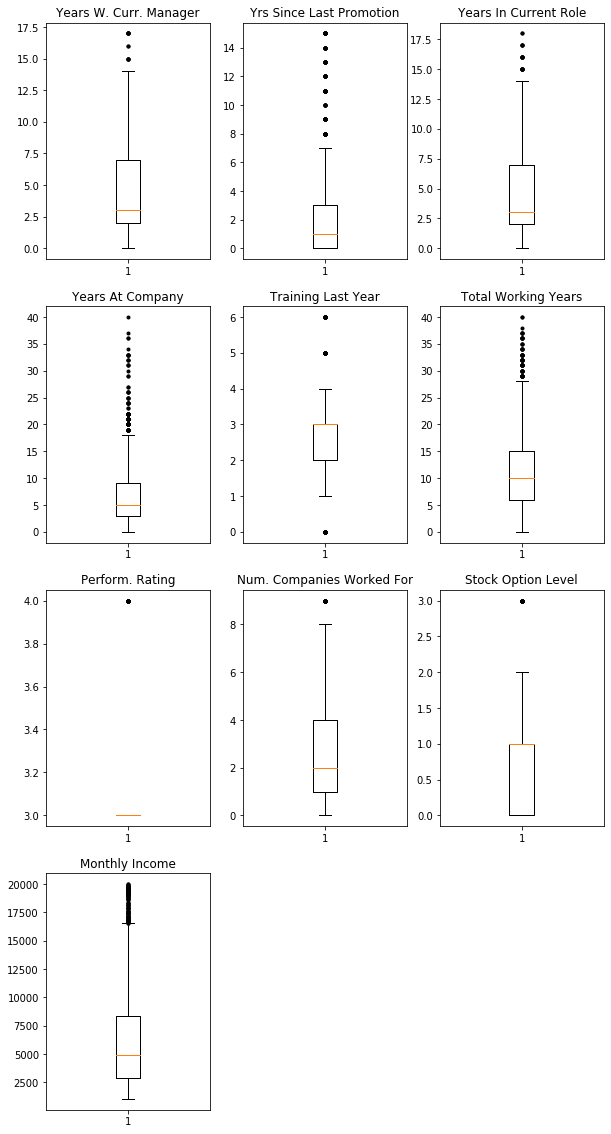

In [9]:
fig = plt.figure(figsize=(10,20))

plt.subplot(4, 3, 1)
plt.boxplot(ibm_df["YearsWithCurrManager"], sym='k.')
plt.title("Years W. Curr. Manager")

plt.subplot(4, 3, 2)
plt.boxplot(ibm_df["YearsSinceLastPromotion"], sym='k.')
plt.title("Yrs Since Last Promotion")

plt.subplot(4, 3, 3)
plt.boxplot(ibm_df["YearsInCurrentRole"], sym='k.')
plt.title("Years In Current Role")

plt.subplot(4, 3, 4)
plt.boxplot(ibm_df["YearsAtCompany"], sym='k.')
plt.title("Years At Company")

plt.subplot(4, 3, 5)
plt.boxplot(ibm_df["TrainingTimesLastYear"], sym='k.')
plt.title("Training Last Year")

plt.subplot(4, 3, 6)
plt.boxplot(ibm_df["TotalWorkingYears"], sym='k.')
plt.title("Total Working Years")

plt.subplot(4, 3, 7)
plt.boxplot(ibm_df["PerformanceRating"], sym='k.')
plt.title("Perform. Rating")

plt.subplot(4, 3, 8)
plt.boxplot(ibm_df["NumCompaniesWorked"], sym='k.')
plt.title("Num. Companies Worked For")

plt.subplot(4, 3, 9)
plt.boxplot(ibm_df["StockOptionLevel"], sym='k.')
plt.title("Stock Option Level")

plt.subplot(4, 3, 10)
plt.boxplot(ibm_df["MonthlyIncome"], sym='k.')
plt.title("Monthly Income")


I'm not sure that I want to remove the outliers.

In [10]:
# Need Attrition to be numeric:
target_map = {'Yes':1, 'No':0}
ibm_df["Attrition_binary"] = ibm_df["Attrition"].apply(lambda x: target_map[x])

In [11]:
#see all correlations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

ibm_df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_binary
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105


Numeric variables that are most correlated with attrition: age, environment satisfaction, job level, years with current manager, years in current role, years at company, total working years, stock option level, monthly income, job satisfaction

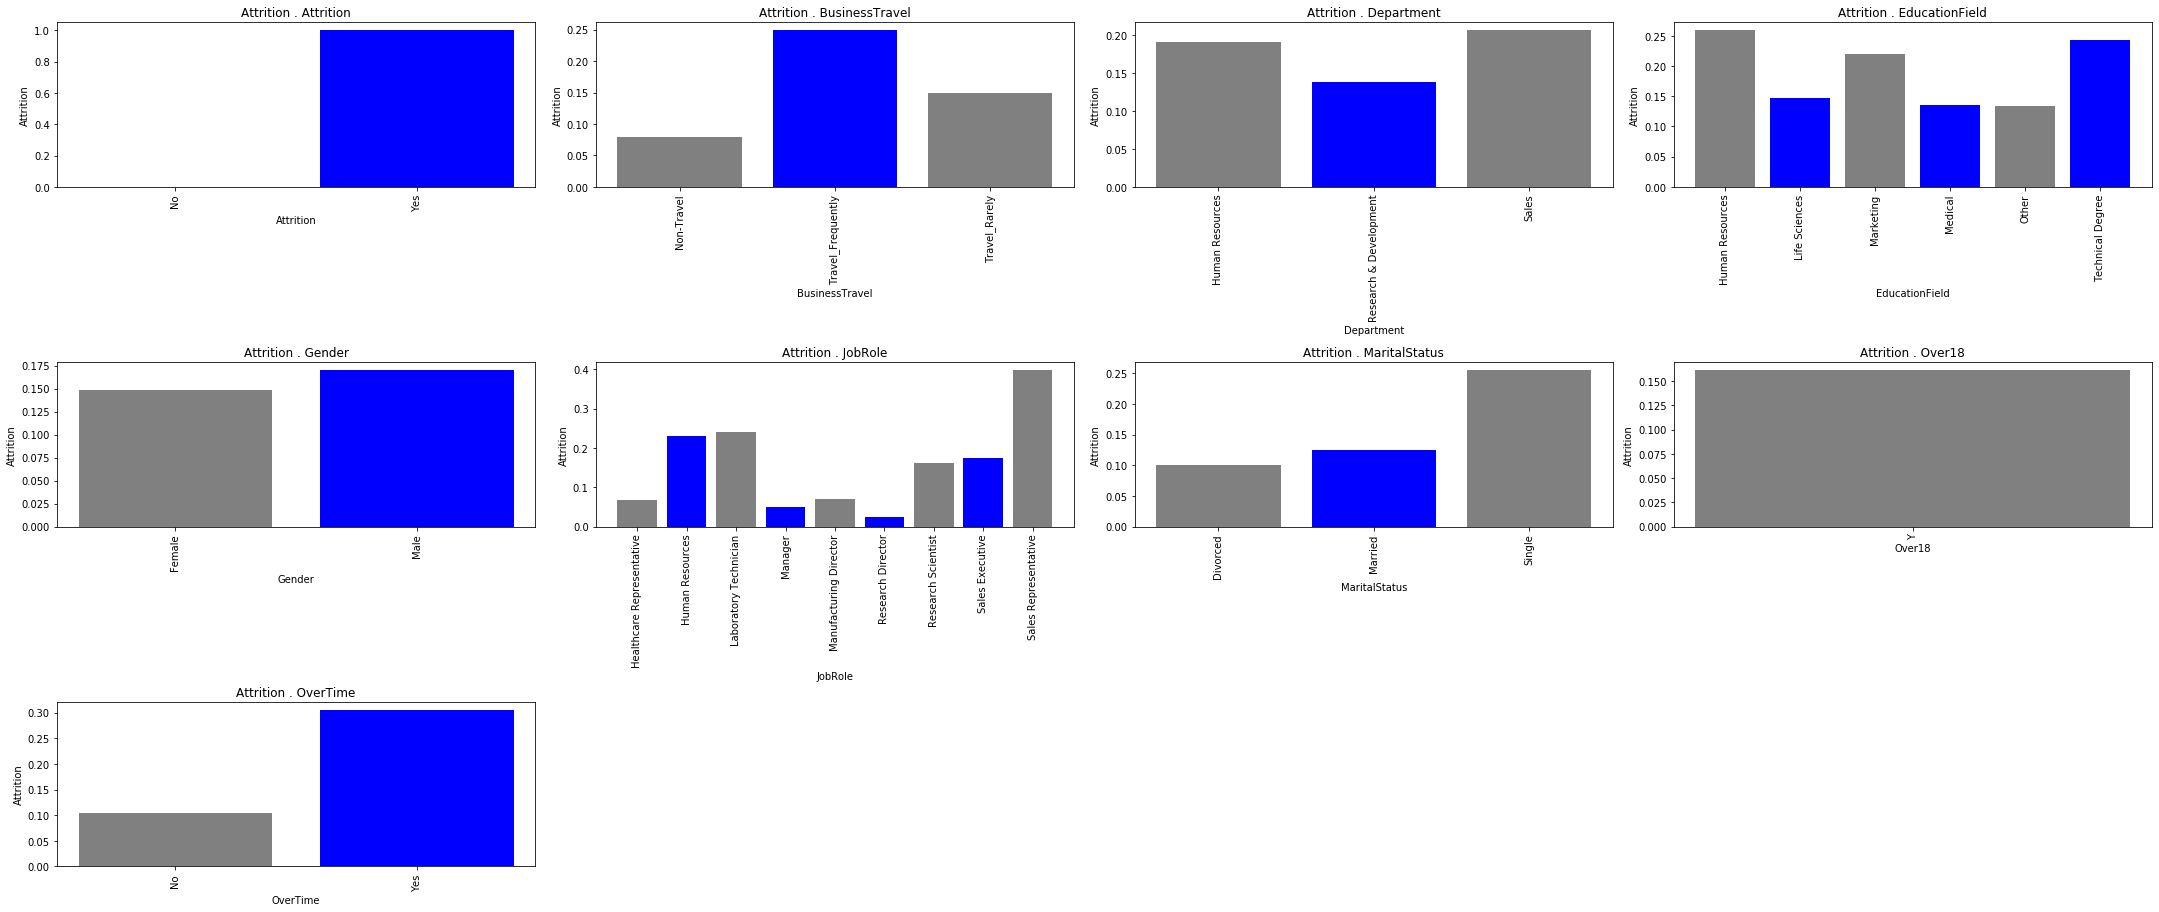

In [13]:
#plot categorical variables against attrition
plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(ibm_df.groupby(column)["Attrition_binary"].mean().index, ibm_df.groupby(column)["Attrition_binary"].mean(),
           color=("grey","blue"))
    plt.title("Attrition . {}".format(column))
    plt.ylabel("Attrition")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

OverTime, BusinessTravel, and MaritalStatus seem to vary along the target variable. Include these in the models.

In [14]:
#dummies for categorical variables
ibm_df = pd.concat([ibm_df,pd.get_dummies(ibm_df.OverTime, prefix="OverTime", drop_first=True)], axis=1)
ibm_df = pd.concat([ibm_df,pd.get_dummies(ibm_df.MaritalStatus, prefix="MaritalStatus", drop_first=True)], axis=1)
ibm_df = pd.concat([ibm_df,pd.get_dummies(ibm_df.BusinessTravel, prefix="BusinessTravel", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(ibm_df.OverTime, prefix="OverTime", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(ibm_df.BusinessTravel, prefix="BusinessTravel", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(ibm_df.MaritalStatus, prefix="MaritalStatus", drop_first=True).columns)




In [15]:
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_binary,OverTime_Yes,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,1,0,1,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,0,1,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,1,0,1,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1,1,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,0,1


Holdout (Split the data)

In [16]:
Y = ibm_df['Attrition_binary']
X = ibm_df[['Age','EnvironmentSatisfaction', 'JobLevel', 'YearsWithCurrManager','YearsInCurrentRole', 'YearsAtCompany','TotalWorkingYears', 'StockOptionLevel','MonthlyIncome', 'JobSatisfaction'] + dummy_column_names]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

PCA

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_standard = StandardScaler().fit_transform(X)

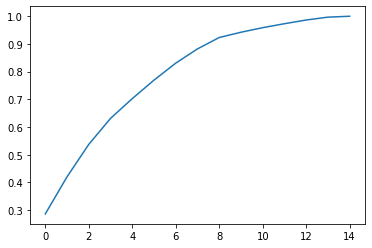

In [18]:
pca = PCA().fit(X_standard)
#look at variance explained by PCA components
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [19]:
pca = PCA(n_components=9)
PCA = pca.fit_transform(X_standard)
pca_variance = pca.explained_variance_ratio_
print('Cumulative Explained Variance: ', pca.explained_variance_ratio_.sum())
print('Percentage of total variance explained by each component:',
    pca.explained_variance_ratio_
)

Cumulative Explained Variance:  0.9232399843738118
Percentage of total variance explained by each component: [0.28632085 0.1338976  0.11714037 0.093797   0.07139555 0.06676448
 0.06141278 0.05134676 0.04116459]


The first 8 components explain 94% of the variance in Y. Use the 9 PCA components in a dataframe, train the models, test the models.

In [20]:
#PCA as a dataframe
PCA = pd.DataFrame(PCA)

In [22]:
#split data based on PCA
X_train, X_test, y_train, y_test = train_test_split(PCA, Y, test_size = 0.2, random_state = 465)

Decision Tree with PCA

In [23]:
from sklearn import tree


decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=18,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=18,
                       max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1337, splitter='best')

In [24]:
#grid search
param_grid = {'max_depth':[3, 5, 9, 12, 15, 18]}

GS_tree1 = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv= 6)
GS_tree1.fit(X_train, y_train)
print(GS_tree1.best_params_)

{'max_depth': 3}


In [25]:
#set max depth = 3 based on grid search results
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1337, splitter='best')

Cross validation, Confusion matrix, Classification_report

In [26]:
print(cross_val_score(decision_tree, X_train, y_train, cv=5))

[0.83898305 0.84322034 0.84255319 0.8212766  0.83333333]


In [27]:
from sklearn.metrics import confusion_matrix
predictions = decision_tree.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[  1  52]
 [  2 239]]


In [28]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
              plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

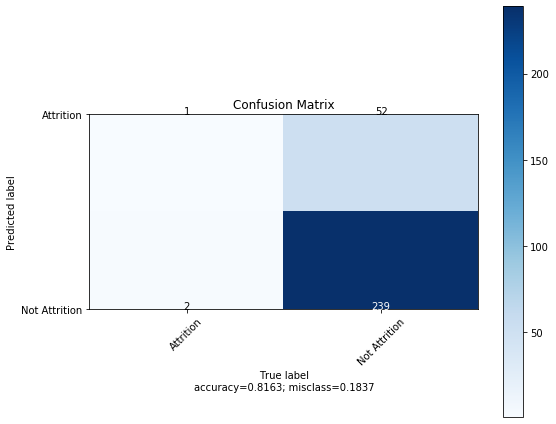

In [29]:
plot_confusion_matrix(cm=confusion, target_names = ['Attrition', 'Not Attrition'], title = 'Confusion Matrix',normalize=False)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       291
           1       0.02      0.33      0.04         3

    accuracy                           0.82       294
   macro avg       0.51      0.58      0.47       294
weighted avg       0.98      0.82      0.89       294



Random Forest with PCA

In [31]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)
score = cross_val_score(rfc, X_train,y_train, cv=5)
print(score)


[0.8559322  0.86864407 0.87234043 0.85106383 0.86324786]


C:\Users\Lowe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
predictions_rf = rfc.predict(X_test)
confusion_rf = confusion_matrix(y_test, predictions_rf, labels=[1, 0])
print(confusion_rf)

[[ 14  39]
 [ 11 230]]


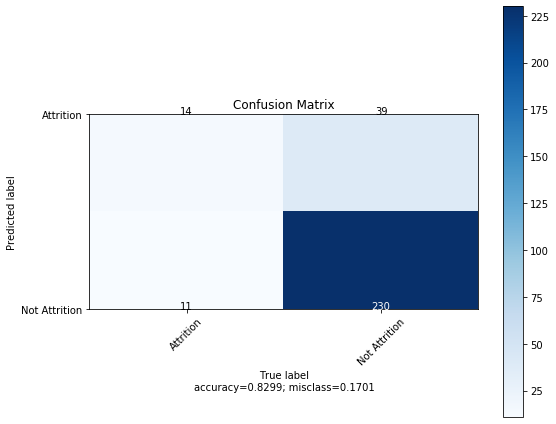

In [49]:
plot_confusion_matrix(cm=confusion_rf, target_names = ['Attrition', 'Not Attrition'], title = 'Confusion Matrix',normalize=False)

In [34]:
print(classification_report(predictions_rf, y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       276
           1       0.17      0.50      0.25        18

    accuracy                           0.82       294
   macro avg       0.57      0.67      0.58       294
weighted avg       0.91      0.82      0.86       294



SelectKBest 

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [62]:
#selectKbest to choose most important features
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)


# concatenate 
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature Name','Score'] 
print(feature_scores.nlargest(20,'Score')) 


           Feature Name      Score
0  OverTime_Yes          94.656457
1  MaritalStatus_Single  46.606985
2  TotalWorkingYears     44.252491
3  JobLevel              43.215344
4  YearsInCurrentRole    38.838303
5  MonthlyIncome         38.488819
6  Age                   38.175887
7  YearsWithCurrManager  36.712311
8  StockOptionLevel      28.140501
9  YearsAtCompany        27.001624


I don't know how to interpret these results aside from them being ordered by importance. What is the cutoff score for keeping a feature? Do I just then choose which features are the best and change X? 

In [63]:
Y = ibm_df['Attrition_binary']
#keep best 10 features. Just guessing here
X = ibm_df[['OverTime_Yes','MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel','YearsInCurrentRole', 'MonthlyIncome','Age', 'YearsWithCurrManager','StockOptionLevel', 'YearsAtCompany']]
#split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [64]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=20,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
                       max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1337, splitter='best')

In [65]:
#use gridsearch
param_grid = {'max_depth':[3, 5, 9, 12, 15, 18]}

GS_tree2 = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv= 6)
GS_tree2.fit(X_train, y_train)
print(GS_tree2.best_params_)


{'max_depth': 3}


In [67]:

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1337, splitter='best')

In [68]:
#see how it performed
print(cross_val_score(decision_tree, X_train, y_train, cv=5))

[0.83050847 0.83898305 0.83404255 0.82978723 0.85042735]


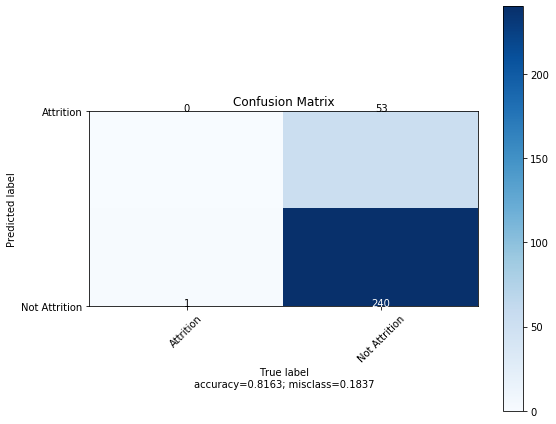

In [69]:
predictions = decision_tree.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
plot_confusion_matrix(cm=confusion, target_names = ['Attrition', 'Not Attrition'], title = 'Confusion Matrix',normalize=False)

In [43]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       293
           1       0.00      0.00      0.00         1

    accuracy                           0.82       294
   macro avg       0.50      0.41      0.45       294
weighted avg       0.99      0.82      0.90       294



Random Forest with the features chosen by SelectKBest

In [51]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)
score = cross_val_score(rfc, X_train,y_train, cv=5)
print(score)


[0.84745763 0.84322034 0.86382979 0.82978723 0.82478632]


C:\Users\Lowe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


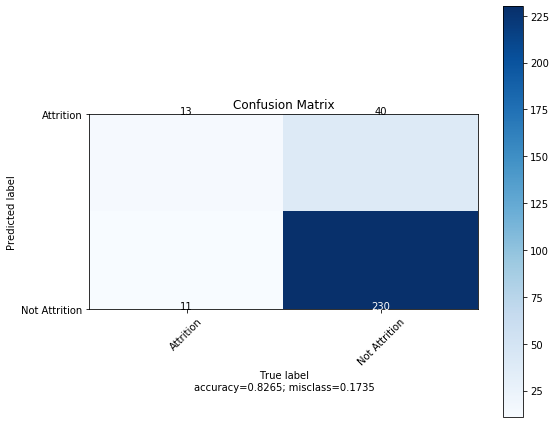

In [52]:
predictions_rf = rfc.predict(X_test)
confusion_rf = confusion_matrix(y_test, predictions_rf, labels=[1, 0])
plot_confusion_matrix(cm=confusion_rf, target_names = ['Attrition', 'Not Attrition'], title = 'Confusion Matrix',normalize=False)

In [46]:
print(classification_report(predictions_rf, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       269
           1       0.26      0.56      0.36        25

    accuracy                           0.83       294
   macro avg       0.61      0.71      0.63       294
weighted avg       0.90      0.83      0.86       294



Steps:  

I performed some data exploration and visualization to determine which features were most related to the target variable. Luckily, there were no missing values. I created dummy variables for the categorical features and converted the target variable to a binary one. I applied PCA and kept 8 components that explained more than 90% of the variance. Using this dataframe, I split the data and then fit a decision tree and random forest. To determine the best max depth for the decision tree, I used gridsearch. Next, I used selectkbest to determine which features are the most important. I decided to keep the 10 best features (arbitrarily, I don't really know how to decide on which features to keep after applying selectkbest). Using these 10 features, I created training and test sets. I then fit a decision tree after using gridsearch to determine the best max depth. Then, I fit a random forest with the same 10 features. For all models, I calculated the cross validation scores, produced confusion matrices, and printed a classificaton report.

Results:  

The cross validation scores for all four models are similar, all hovering around .83 to .85. The PCA Random Forest did have the best cross validation scores, but only slightly. The random forest models (for both PCA and selectKbest) slightly outperformed the decision trees in terms of accuracy. The confusion matrices and accuracy scores show that both RF models had an accuracy score of .83 in comparison to the DT models that had accuracy of .816. However, both DT models had higher precision scores (.99 for PCA and 1.00 for selectKbest) in comparision to the RF models (.96 for PCA and .95 for selectKbest). On the flip side, the RF models scored slightly better for recall (.84 for PCA and .86 for selectKbest) versus .82 for both DT models. In general, each model has pros and cons and the analyst should choose the model that best suits their needs. For instance, if you want a precise model, the decision trees performed better. If you want a model with better recall, the random forests performed better. In comparing PCA and selectKbest, the two performed similarly. The differences were so small that it is almost negligible (example, looking at just accuracy, PCA DT accuracy was .8163 and selectKbest accuracy was .817; PCA RF and selectKbest accuracy scores were both .83). 

Improvements and Questions:  
I think removing the outliers might improve the goodness of fit indicators for all 4 models. I am also unsure if I should have used gridsearch with the random forest models, or if that is even possible. If that can be done, that might have improved the random forest models. In regard to selectKbest, I do not know whether there is a cutoff f score that I should use. I just arbitrarily chose the best 10 features. I expect that if I chose the correct features in the future, there might be more of a difference between the selectKbest and PCA models. I also don't know whether I even did selectKbest the right way. I got a list of the best features and then just used the top 10 features as X. I'm also unsure whether multicollineary matters in DT and RF matters the way it does in OLS. I did not consider whether the features were correlated to each other, but perhaps I should have. 